# Homework 02 - Exploratory Data Analysis in Python
## Author: Sanjay Bhargav Siddi

## 3. Assess relationships within a novel data set
####     a) Describe and visualize correlations between numerical variables
####     b) Visualize correlations of all numerical variables within groups
####     c) Describe and visualize relationships based on target variables

### 3.1. Required Setup 

In [1]:
# Import all required libraries
# Data analysis and manipulation
import pandas as pd
# Working with arrays
import numpy as np
# Statistical visualization
import seaborn as sns
# Matlab plotting for Python
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Data analysis
import statistics as stat
import scipy.stats as stats
# Two-sample Chi-Square test
from scipy.stats import chi2_contingency
# Predictive data analysis: process data 
from sklearn import preprocessing as pproc
# Predictive data analysis: linear models
from sklearn.model_selection import cross_val_predict
# Predictive data analysis: linear models
from sklearn.linear_model import LinearRegression
# Visualizing missing values
import missingno as msno
# Statistical modeling
import statsmodels.api as sm
# Statistical modeling: ANOVA
from statsmodels.formula.api import ols
# Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(8, 8)})

# Change theme to "white"
sns.set_style("white")

### 3.2 Loading a data set 

In [2]:
tornadosData = pd.read_csv('C:/Users/sanja/OneDrive/Desktop/University of Arizona Classes/INFO 523 - Data Mining/HW/hw-02-SanjaySiddi/data/tornados.csv')

### 3.3 Examining the data set and trimming the data

In [3]:
tornadosData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

In [4]:
# creating a copy of the tornados data set
data = tornadosData.copy()

# renaming columns for readability
data = data.rename(columns={'om':'Tornado ID','yr':'Year','mo':'Month','dy':'Day','date':'Date','time':'Time','tz':'Timezone','st':'State','mag':'Magnitude','inj':'Injuries','fat':'Fatality','loss':'Loss','len':'Length','wid':'Width','ns':'States Affected'})

# removing non-important columns 
data = data.drop(columns=['Tornado ID','Time','Timezone','Month','Day','datetime_utc','stf','slat','slon','elat','elon','f1','f2','f3','f4','sn','fc'])

# filling NaN with 0
data = data.fillna(0)

##### Creating a sub group 

In [5]:
def loss_group_data(data): 
  if data.Loss >= 0 and data.Loss <= 10000: return "Low loss"
  elif data.Loss > 10000 and data.Loss <= 100000: return "Medium loss" 
  else: return "Huge loss"

# Apply the function to data
data['Loss_group'] = data.apply(loss_group_data, axis = 1)

# What does the data look like
data.head(1000)

,Year,Date,State,Magnitude,Injuries,Fatality,Loss,Length,Width,States Affected,Loss_group
0,1950,1950-10-01,OK,1.0,0,0,50000.0,15.8,10,1,Medium loss
1,1950,1950-10-09,NC,3.0,3,0,500000.0,2.0,880,1,Huge loss
2,1950,1950-11-20,KY,2.0,0,0,500000.0,0.1,10,1,Huge loss
3,1950,1950-11-20,KY,1.0,0,0,500000.0,0.1,10,1,Huge loss
4,1950,1950-11-20,MS,1.0,3,0,50000.0,2.0,37,1,Medium loss
...,...,...,...,...,...,...,...,...,...,...,...
995,1953,1953-06-04,FL,1.0,0,0,50.0,0.1,10,1,Low loss
996,1953,1953-06-05,FL,0.0,0,0,50.0,0.1,10,1,Low loss
997,1953,1953-06-05,UT,0.0,0,0,0.0,8.0,147,1,Low loss
998,1953,1953-06-05,TX,0.0,0,0,0.0,0.1,10,1,Low loss


### 3.4. Describe and Visualize Correlations 

In [6]:
# subset dataframe to include only numeric columns
numData = data.select_dtypes(include='number')

# Table of correlations between numerical variables
numData.corr()

,Year,Magnitude,Injuries,Fatality,Loss,Length,Width,States Affected
Year,1.000000,-0.291051,-0.042735,-0.033557,0.006165,-0.060327,0.116627,0.019638
Magnitude,-0.291051,1.000000,0.220586,0.195350,0.134760,0.441320,0.420711,0.126749
Injuries,-0.042735,0.220586,1.000000,0.761659,0.518769,0.256337,0.185440,0.113673
Fatality,-0.033557,0.195350,0.761659,1.000000,0.462200,0.237266,0.174050,0.112272
Loss,0.006165,0.134760,0.518769,0.462200,1.000000,0.148073,0.167963,0.048318
Length,-0.060327,0.441320,0.256337,0.237266,0.148073,1.000000,0.378556,0.254201
Width,0.116627,0.420711,0.185440,0.174050,0.167963,0.378556,1.000000,0.136645
States Affected,0.019638,0.126749,0.113673,0.112272,0.048318,0.254201,0.136645,1.000000


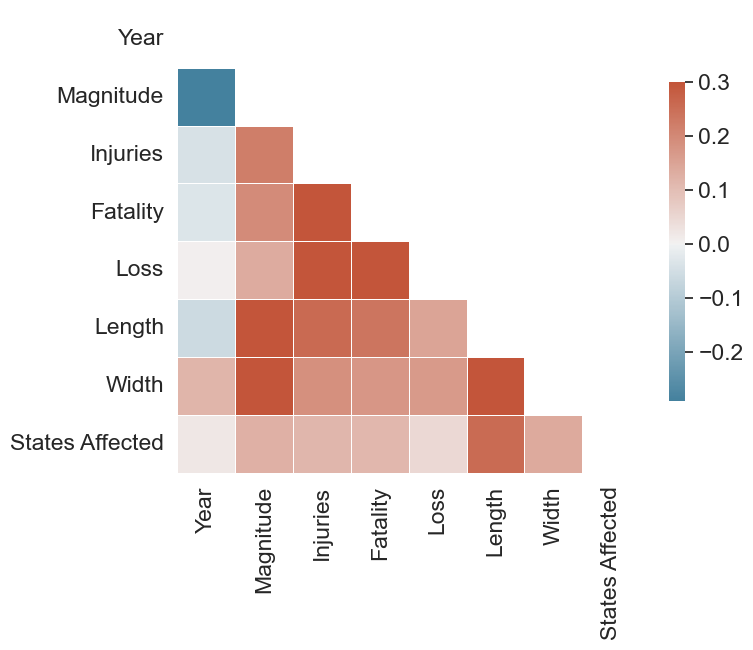

In [7]:
# Heatmap correlation matrix of numerical variables
# Correlation matrix
corr = numData.corr()

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generating a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Heatmap of the correlation matrix
sns.heatmap(corr, cmap = cmap, mask = mask, vmax = 0.3, center = 0,
            square = True, linewidths = 0.5, cbar_kws = {"shrink": .5})
            
# Tight margins for plot
plt.tight_layout()

# Show plot
plt.show()

#### There is a strong positive correlation between the Magnitude and length, magnitude and width - as the length increases, the magnitude also increases, similarly with the width as represented by the color and darkness of the blocks.

### 3.5. Visualize Correlations within Groups 

C:\Users\sanja\AppData\Local\Temp\ipykernel_16324\1357174802.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr = data.groupby('Loss_group').corr()


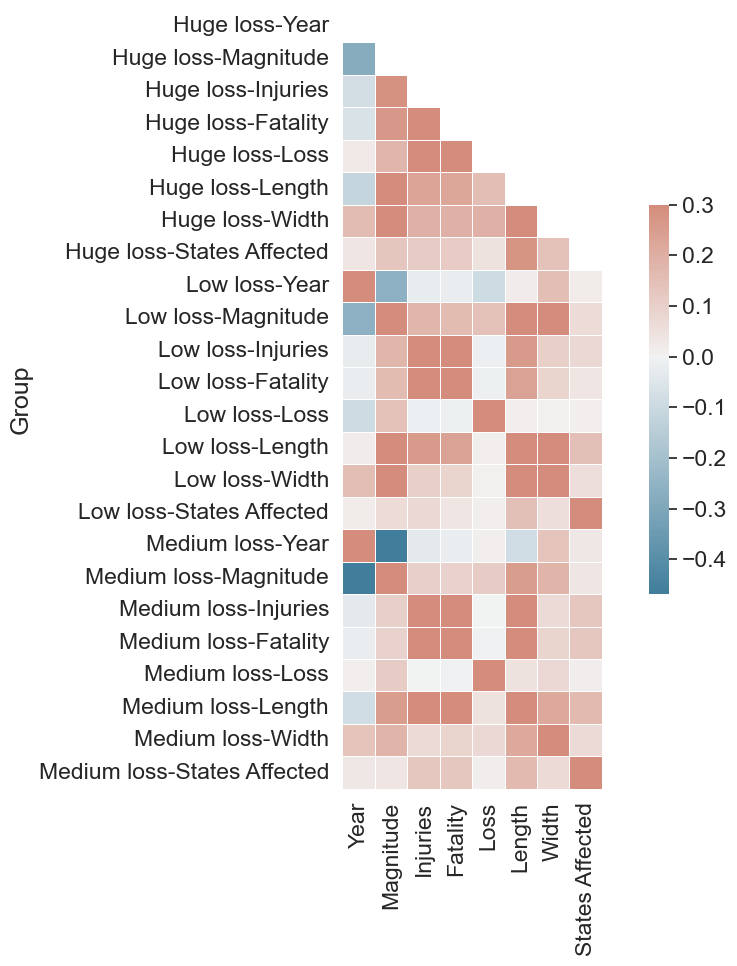

In [8]:
# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(10, 10)})

# Change theme to "white"
sns.set_style("white")

# Heatmap correlation matrix of numerical variables
# Correlation matrix
corr = data.groupby('Loss_group').corr()

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generaing a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Heatmap of the correlation matrix
ax = sns.heatmap(corr, cmap = cmap, mask = mask, vmax = 0.3, center = 0,
            square = True, linewidths = 0.5, cbar_kws = {"shrink": .5})
            
# Change y-axis label
ax.set(ylabel = 'Group')

# Tight margins for plot
plt.tight_layout()

# Show plot
plt.show()

#### There is a strong negative correlation between the Medium loss-Year and the magnitude, we can also observe a weak positive correlation between Low loss - Injuries and States affected

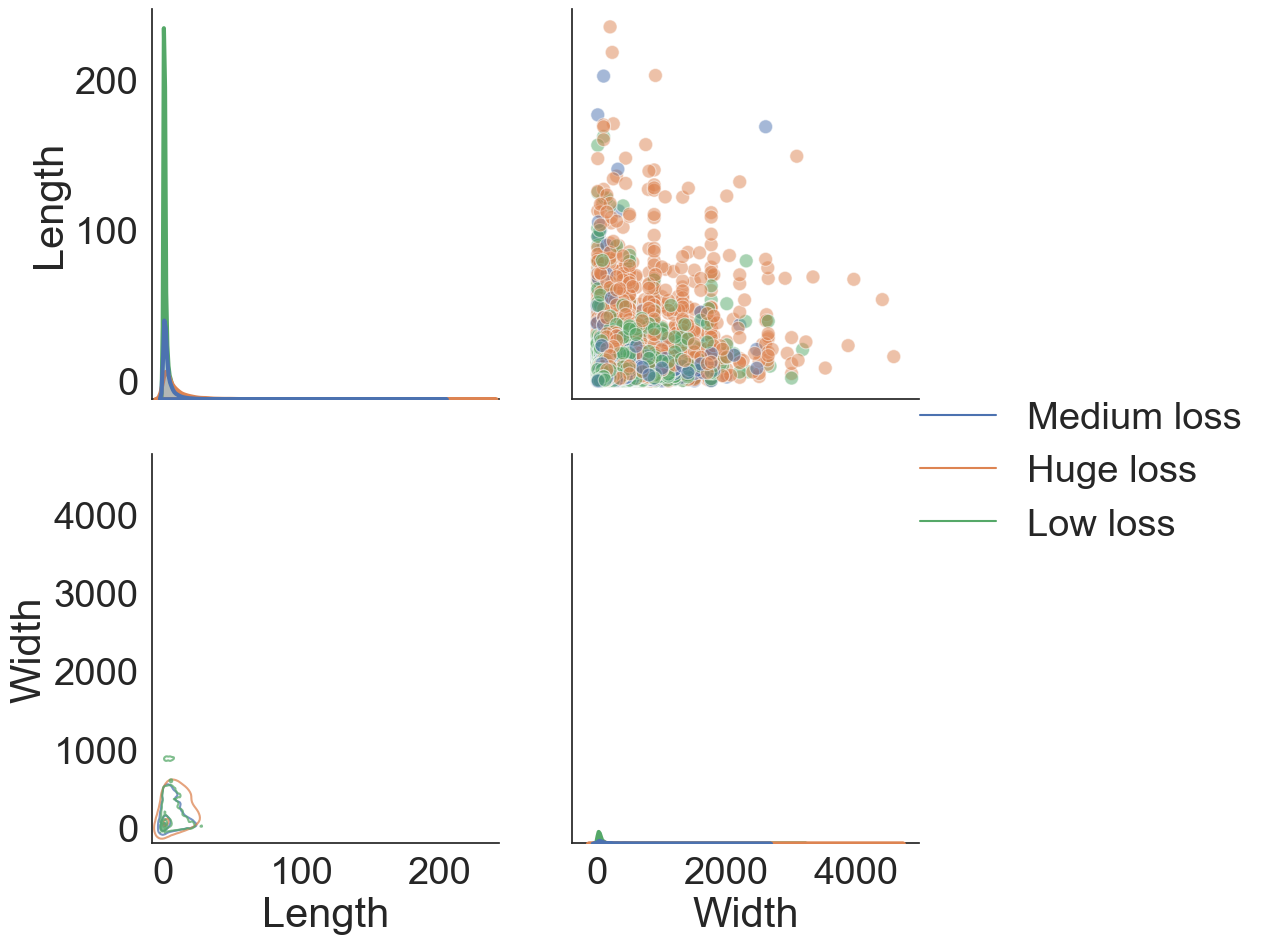

In [9]:
dataplot = data[["Loss_group", "Length", "Width"]]

# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 2.5, rc = {'figure.figsize':(10, 10)})

# Change seaborn plot theme to white
sns.set_style("white")

# Empty subplot grid for pairwise relationships
g = sns.PairGrid(dataplot, hue = "Loss_group", height = 5)

# Adding scatterplots to the upper portion of the grid
g1 = g.map_upper(sns.scatterplot, alpha = 0.5, s = 100)

# Adding a kernal density plot to the diagonal of the grid
g2 = g1.map_diag(sns.kdeplot, fill = True, linewidth = 3)

# Adding a kernal density plot to the lower portion of the grid
g3 = g2.map_lower(sns.kdeplot, levels = 5, alpha = 0.75)

# Remove legend title
g4 = g3.add_legend(title = "", adjust_subtitles = True)

# Show plot
plt.show()

#### The first plot has a right skewed, unimodal distribution
#### For the second plot - as the length and width increases, the huge loss is scattered
#### 3rd plot - I couldn't figure out anything from this plot
#### The fourth plot is a tiny unimodal right skewed plot 

### 3.6. Describe and Visualize Relationships Based on Target Variables 

#### Numerical Target Variables: Numerical Variable of Interest 

In [10]:
# The numerical predictor variable 
X = data[["Year"]]

# The numerical target variable
Y = data[["Magnitude"]]

# Defining the linear model, drop NAs
model = sm.OLS(Y, X, missing = 'drop')

# Fitting the model
model_result = model.fit()

# Summary of the linear model
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Magnitude   R-squared (uncentered):                   0.423
Model:                            OLS   Adj. R-squared (uncentered):              0.423
Method:                 Least Squares   F-statistic:                          5.032e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                        0.00
Time:                        19:18:08   Log-Likelihood:                         -89986.
No. Observations:               68693   AIC:                                  1.800e+05
Df Residuals:                   68692   BIC:                                  1.800e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0004   1.72e-06    224.329      0.000       0.000       0.000
==============================================================================
Omnibus:                    11222.689   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17969.269
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                       4.066   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

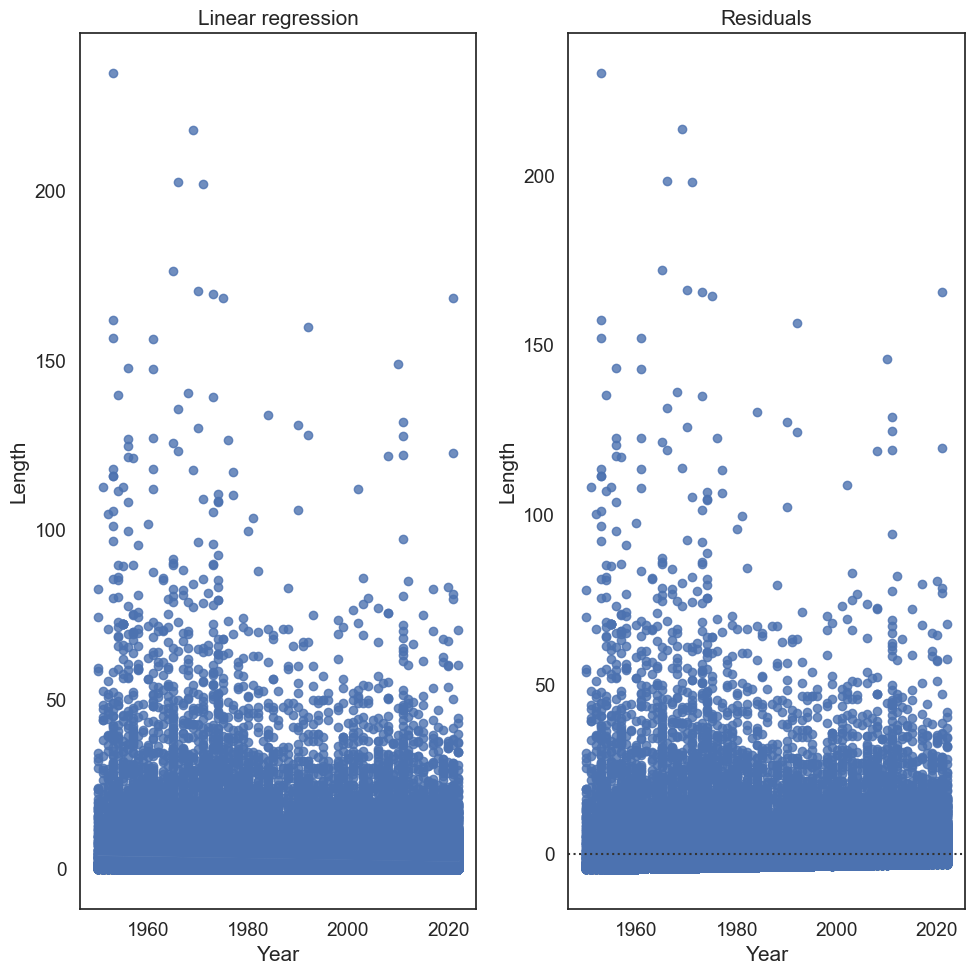

In [11]:
# Plotting the linear relationship

# Increase font and figure size of all seaborn plot elements
sns.set(font_scale = 1.25, rc = {'figure.figsize':(10,10)})

# Change seaborn plot theme to white
sns.set_style("white")

# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Regression plot between Length and Width
sns.regplot(data = data, x = "Year", y = "Length", ax = ax1)

# Setting regression plot title
ax1.set_title("Linear regression")

# Regression plot between Length and Width
sns.residplot(data = data, x = "Year",
              y = "Length", ax = ax2)
              
# Setting residual plot title
ax2.set_title("Residuals")

# Tight margins
plt.tight_layout()

# Show plot
plt.show()

####  Cannot make out any best fit line from the above plot

##### Numerical Target Variables: Categorical Variable of Interest 

In [12]:
model = ols('Magnitude ~ C(Loss_group)', data = data).fit()

sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(Loss_group),16892.277498,2.0,15237.176868,0.0
Residual,38075.640631,68690.0,NaN,NaN


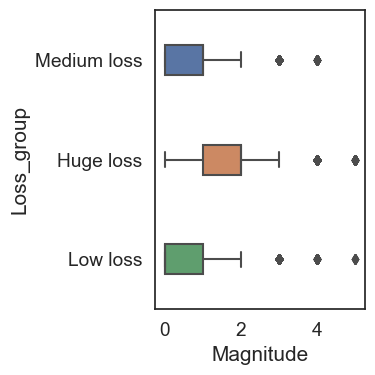

In [13]:
# Increasing font and figure size of all seaborn plot elements
sns.set(font_scale = 1.25, rc = {'figure.figsize':(4, 4)})

# Changing seaborn plot theme to white
sns.set_style("white")

# Box plot
Group_Box = sns.boxplot(data = data, x = "Magnitude", y = "Loss_group", width = 0.3)

# Tweaking the visual presentation
Group_Box.set(ylabel = "Loss_group")

# Tight margins
plt.tight_layout()

# Show plot
plt.show()

#### Categorical Target Variables: Numerical Variable of Interest 

In [14]:
# Grouped describe by one column, stacked 
Groups = data.groupby('Loss_group').describe().unstack(1)

# Printing all rows
print(Groups.to_string())

                        Loss_group 
Year             count  Huge loss      1.369700e+04
                        Low loss       3.942300e+04
                        Medium loss    1.557300e+04
                 mean   Huge loss      1.990799e+03
                        Low loss       1.993182e+03
                        Medium loss    1.989421e+03
                 std    Huge loss      1.820398e+01
                        Low loss       1.941247e+01
                        Medium loss    2.077901e+01
                 min    Huge loss      1.950000e+03
                        Low loss       1.950000e+03
                        Medium loss    1.950000e+03
                 25%    Huge loss      1.977000e+03
                        Low loss       1.978000e+03
                        Medium loss    1.972000e+03
                 50%    Huge loss      1.991000e+03
                        Low loss       1.997000e+03
                        Medium loss    1.991000e+03
                 75%    Huge

#### Categorical Target Variables: Categorical Variable of Interest 

In [15]:
data1 = data.dropna()
Qual = stat.mean(data1.Magnitude + stat.stdev(data1.Magnitude))
print(Qual)
# Create HighMagnitude from the Magnitude column
def HighMagnitude_data(data): 
  if data.Magnitude >= Qual: return "Yes"
  else: return "No"

# Apply the function to data and create a dataframe
HighMagnitude = pd.DataFrame(data1.apply(HighMagnitude_data, axis = 1))

# Name new column
HighMagnitude.columns = ['HighMagnitude']

# Concatenate the two dataframes
data1 = pd.concat([data1, HighMagnitude], axis = 1)

# First six rows of new dataset
data1.head()

1.664694957327893


,Year,Date,State,Magnitude,Injuries,Fatality,Loss,Length,Width,States Affected,Loss_group,HighMagnitude
0,1950,1950-10-01,OK,1.0,0,0,50000.0,15.8,10,1,Medium loss,No
1,1950,1950-10-09,NC,3.0,3,0,500000.0,2.0,880,1,Huge loss,Yes
2,1950,1950-11-20,KY,2.0,0,0,500000.0,0.1,10,1,Huge loss,Yes
3,1950,1950-11-20,KY,1.0,0,0,500000.0,0.1,10,1,Huge loss,No
4,1950,1950-11-20,MS,1.0,3,0,50000.0,2.0,37,1,Medium loss,No


In [16]:
obs = pd.crosstab(data1.Loss_group, data1.HighMagnitude)
print(obs)

HighMagnitude     No   Yes
Loss_group                
Huge loss       6666  7031
Low loss       36784  2639
Medium loss    12407  3166


In [17]:
# Chi-square test
chi2, p, dof, ex = chi2_contingency(obs, correction = False)
  
# Interpret
alpha = 0.05
  
# Printing the interpretation
print('Statistic = %.3f, p = %.3f' % (chi2, p))

Statistic = 13366.460, p = 0.000


In [18]:
if p > alpha:
  print('Chi-square value is not greater than critical value (fail to reject H0)')
else:
    print('Chi-square value is greater than critical value (reject H0)')

Chi-square value is greater than critical value (reject H0)


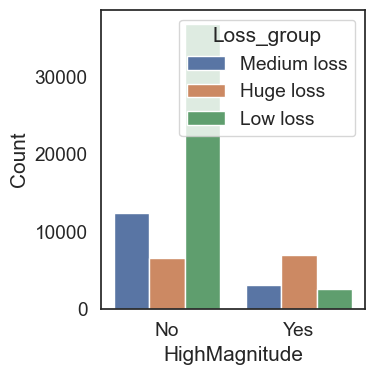

In [19]:
# Increasing font and figure size of all seaborn plot elements
sns.set(font_scale = 1.25)

# Changing seaborn plot theme to white
sns.set_style("white")

# Counting plot of HighMagnitude grouped by Loss_Group 
counts = sns.countplot(data = data1, x = "HighMagnitude", hue = "Loss_group")

# Tweaking the visual presentation
counts.set(ylabel = "Count")

# Tight margins
plt.tight_layout()

# Show plot
plt.show()